# Set file path

In [1]:
#@markdown ### Enter a file path:
filepath = "/content/drive/MyDrive/portfolio/ann" #@param {type:"string"}

# Install libraries

In [2]:
!pip install numpy
!pip install matplotlib

# Import libraries

In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# Train model

### Initialize neural network architecture parameters

In [4]:
n_h1 =  7#@param {type:"integer"}
n_h2 =  5#@param {type:"integer"}
eta =  0.01#@param {type:"number"}
max_epoch = 100 #@param {type:"integer"}
thresh = 0.001 #@param {type:"number"}

In [5]:
def train_model(X,Y,n_h1,n_h2,eta,max_epoch,thresh):
	# Load training data
	

	# One-hot encoding on labels
	one_hot = np.zeros((Y.size, int(Y.max())+1))
	one_hot[np.arange(Y.size),Y.astype(int)] = 1
	Y = one_hot[:,1:]
	print(Y.shape)

	# Architecture Definition
	# Input layer
	n_in=X.shape[1]
	# Hidden Layer 1
	n_h1=n_h1
	# Hidden Layer 2
	n_h2=n_h2
	# Output layer
	n_out=Y.shape[1]
	eta=eta

	# Pre-allocate storage and initialize weights + biases
	x_in=np.zeros((n_in,1))

	w_h1= -0.1 + np.dot((0.1 + 0.1),np.random.rand(n_h1,n_in))
	b_h1=- 0.1 + np.dot((0.1 + 0.1),np.random.rand(n_h1,1))

	w_h2=- 0.1 + np.dot((0.1 + 0.1),np.random.rand(n_h2,n_h1))
	b_h2=- 0.1 + np.dot((0.1 + 0.1),np.random.rand(n_h2,1))
	w_out=- 0.1 + np.dot((0.1 + 0.1),np.random.rand(n_out,n_h2))

	b_out=- 0.1 + np.dot((0.1 + 0.1),np.random.rand(n_out,1))
	d_out=np.zeros((n_out,1))

	# Number of instances
	N = X.shape[0]
	# Number of epochs limit
	max_epoch=max_epoch

	# TRAINING PHASE
	# Store network error for every iteration
	totalerr=np.zeros((max_epoch,1))

	# Learning continues until max_epoch is reached
	# or when network error is less than 0.001
	for q in np.arange(0,max_epoch).reshape(-1):
	    # Shuffle data
	    p=np.random.permutation(N)
	    for n in np.arange(0,N).reshape(-1):
	        nn=p[n]
	        x_in=X[nn,:].T
	        d_out=Y[nn,:].T
	        d_out = np.reshape(d_out, (d_out.shape[0],1))
	       
	        # Hidden layer 1
	        v_h1=np.dot(w_h1,x_in) + b_h1
	        y_h1=1.0 / (1 + np.exp(- v_h1))
	        
	        v_h2=np.dot(w_h2,y_h1) + b_h2
	        y_h2=1.0 / (1 + np.exp(- v_h2))
	        v_out=np.dot(w_out,y_h2) + b_out

	        out=1.0 / (1 + np.exp(- v_out))
	  
	        # Compute error
	        err=d_out - out

	        # Backward pass
	        delta_out=np.multiply(np.multiply(err,out),(1 - out))
	        delta_h2=np.multiply(np.multiply(y_h2,(1 - y_h2)),(np.dot(w_out.T,delta_out)))
	        delta_h1=np.multiply(np.multiply(y_h1,(1 - y_h1)),(np.dot(w_h2.T,delta_h2)))

	        w_out=w_out + np.dot(np.multiply(eta,delta_out),y_h2.T)
	        b_out=b_out + np.multiply(eta,delta_out)
	        
	        w_h2=w_h2 + np.dot(np.multiply(eta,delta_h2),y_h1.T)
	        b_h2=b_h2 + np.multiply(eta,delta_h2)

	        w_h1=w_h1 + np.dot(np.multiply(eta,delta_h1),x_in.T)
	        b_h1=b_h1 + np.multiply(eta,delta_h1)

	    totalerr[q]=totalerr[q] + np.sum(np.multiply(err,err))

	    # Display error every 500th iteration
	    if q != 0 and q%500 == 0:
	        print('iteration: %d Error: %f' %(q,totalerr[q]))
	    # If termination condition is satisfied save weights and exit
	    if totalerr[q] < thresh:
	        break

	weights = [w_h1,w_h2,w_out]
	biases = [b_h1,b_h2,b_out]
	return weights,biases,q,totalerr


### Load training data

In [6]:
X = np.asmatrix(np.loadtxt(open(filepath + "/training_set.csv", "rb"), delimiter=",",dtype = np.float64))
Y = np.loadtxt(open(filepath + "/training_labels.csv", "rb"), delimiter=",",dtype = np.float64)

### Train model

In [7]:
weights,biases,q,totalerr = train_model(X,Y,n_h2,n_h1,eta,max_epoch,thresh)

(7800, 8)


# Test model

In [8]:
def test_model(X_val,Y_val,trained_weights,trained_biases):
	# TEST PHASE
  w_h1,w_h2,w_out = trained_weights
  b_h1,b_h2,b_out = trained_biases 

  n_in=X_val.shape[1]

	# One-hot encoding labels
  one_hot = np.zeros((Y_val.size, int(Y_val.max())+1))
  one_hot[np.arange(Y_val.size),Y_val.astype(int)] = 1
  Y_val = one_hot[:,1:]

  X = X_val
  Y = Y_val
  N = X.shape[0]
  print("X shape: ", X.shape)

	# Store predicted output
  nn_output=np.zeros(Y.shape)
  print("Y shape: ", Y.shape)
	# Prediction continues until all instances are exhausted
  for n in np.arange(0,N).reshape(-1):
	    x_in=X[n,:].T
	    d_out=Y[n,:].T
	    d_out = np.reshape(d_out, (d_out.shape[0],1)) 

	    v_h1=np.dot(w_h1,x_in) + b_h1
	    y_h1=1.0 / (1 + np.exp(- v_h1))

	    v_h2=np.dot(w_h2,y_h1) + b_h2
	    y_h2=1.0 / (1 + np.exp(- v_h2))
	    v_out=np.dot(w_out,y_h2) + b_out

	    out=1.0 / (1 + np.exp(- v_out))
	    nn_output[n]=np.equal(out.T,np.max(out)).astype(int)

  return nn_output,Y

### Load validation data

In [9]:
X_val = np.asmatrix(np.loadtxt(open(filepath + "/validation_set.csv", "rb"), delimiter=",",dtype = np.float64))
Y_val = np.loadtxt(open(filepath+"/validation_labels.csv", "rb"), delimiter=",",dtype = np.float64)


### Test

In [10]:
nn_output, Y_one_hot = test_model(X_val, Y_val,weights,biases)

X shape:  (697, 354)
Y shape:  (697, 8)


# Evaluate

In [11]:
 def evaluate(Y,nn_output,q,totalerr):
  print('\nTotal instances with error: ',np.sum(np.sum(np.abs(Y - nn_output))))
  print('\nTotal epochs: ',q)
  print('\nNetwork Error at termination: ',totalerr[q])

  # Plot network error over epochs
  plt.plot(totalerr)
  plt.show()



Total instances with error:  744.0

Total epochs:  99

Network Error at termination:  [0.87676787]


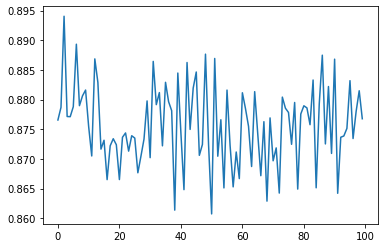

In [12]:
evaluate(Y_one_hot,nn_output,q,totalerr)

# Predict unlabeled data

In [13]:
def predict(X,weights,biases):
	w_h1,w_h2,w_out = weights
	b_h1,b_h2,b_out = biases 
	
	N = X.shape[0]
	nn_output=np.zeros((X.shape[0],8))
	res_output = np.zeros((X.shape[0],1))

	# Pre-allocate storage and initialize weights + biases
	n_in=X.shape[1]

	# Predict labels for every instance in X
	for n in np.arange(0,N).reshape(-1):
	    x_in = X[n,:].T

	    v_h1 = np.dot(w_h1,x_in) + b_h1
	    y_h1 = 1.0 / (1 + np.exp(- v_h1))

	    v_h2 = np.dot(w_h2,y_h1) + b_h2
	    y_h2 = 1.0 / (1 + np.exp(- v_h2))
	    v_out = np.dot(w_out,y_h2) + b_out

	    out = 1.0 / (1 + np.exp(- v_out))
	    nn_output[n] = np.equal(out.T,np.max(out)).astype(int)

	    # Store output from a one-hot encoded format to original label format
	    res_output[n] = np.nonzero(nn_output[n])[0] + 1
	return res_output

### Load unlabeled data


In [14]:
X = np.asmatrix(np.loadtxt(open(filepath + "/unknown_labels_set.csv", "rb"), delimiter=",",dtype = np.float64))

### Predict

In [ ]:
res_output = predict(X,weights,biases)
res_output